In [2]:
'''Load Profits Statistics Summary Data for All Years'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load profits statistics summary data for all three years
data_2022 = pd.read_csv('../FINAL MODEL/Results/profits_statistics_summary_2022.csv')
data_2023 = pd.read_csv('../FINAL MODEL/Results/profits_statistics_summary_2023.csv')
data_2024 = pd.read_csv('../FINAL MODEL/Results/profits_statistics_summary_2024.csv')

# Add year column to each dataframe
data_2022['year'] = 2022
data_2023['year'] = 2023
data_2024['year'] = 2024

# Combine all years into one dataframe
profits_stats = pd.concat([data_2022, data_2023, data_2024], ignore_index=True)

# Display basic info about the data
print("Profits Statistics Summary Data Shape:", profits_stats.shape)
print("\nColumns:", profits_stats.columns.tolist())
print("\nFirst few rows:")
profits_stats.head()

Profits Statistics Summary Data Shape: (51, 17)

Columns: ['config_id', 'power_mw', 'energy_mwh', 'dam_mean', 'idm_mean', 'dc_mean', 'dam_variance', 'idm_variance', 'dc_variance', 'corr_dam_idm', 'corr_dam_dc', 'corr_idm_dc', 'cov_dam_idm', 'cov_dam_dc', 'cov_idm_dc', 'num_days', 'year']

First few rows:


,config_id,power_mw,energy_mwh,dam_mean,idm_mean,dc_mean,dam_variance,idm_variance,dc_variance,corr_dam_idm,corr_dam_dc,corr_idm_dc,cov_dam_idm,cov_dam_dc,cov_idm_dc,num_days,year
0,1,10,10,1196.5630,1149.2658,4114.7490,1.986769e+06,8.833631e+05,9.684357e+06,0.5408,0.0669,0.0451,7.164474e+05,2.933548e+05,1.318323e+05,365,2022
1,2,30,30,3589.6889,3447.7975,12344.2534,1.788092e+07,7.950266e+06,8.715930e+07,0.5408,0.0669,0.0451,6.448028e+06,2.640196e+06,1.186508e+06,365,2022
2,3,50,50,5982.8150,5746.3295,20573.7512,4.966922e+07,2.208407e+07,2.421092e+08,0.5408,0.0669,0.0451,1.791119e+07,7.333843e+06,3.295831e+06,365,2022
3,4,100,100,11965.6299,11492.6588,41147.5025,1.986769e+08,8.833627e+07,9.684367e+08,0.5408,0.0669,0.0451,7.164474e+07,2.933538e+07,1.318333e+07,365,2022
4,5,10,15,1718.8806,1637.2897,4114.7490,3.889986e+06,1.865660e+06,9.684357e+06,0.5487,0.0672,0.0434,1.478259e+06,4.124341e+05,1.843782e+05,365,2022


CREATING 2024 CORRELATION HEATMAP


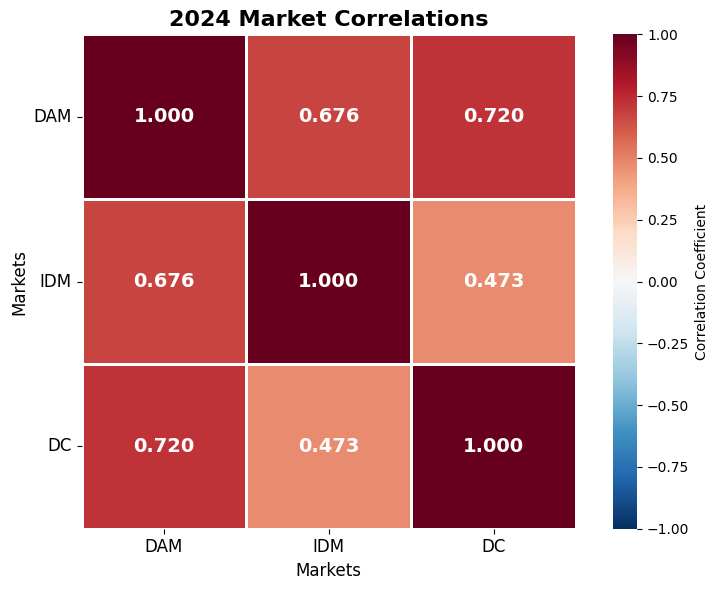


2024 Market Correlations:
  DAM-IDM: 0.676
  DAM-DC:  0.720
  IDM-DC:  0.473


In [16]:
# Create correlation heatmap for 2024 only
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("CREATING 2024 CORRELATION HEATMAP")
print("="*50)

# Filter for 2024 data only
data_2024 = profits_stats[profits_stats['year'] == 2024]

if len(data_2024) > 0:
    # Get correlation data for 2024
    corr_dam_idm = data_2024['corr_dam_idm'].mean()
    corr_dam_dc = data_2024['corr_dam_dc'].mean()
    corr_idm_dc = data_2024['corr_idm_dc'].mean()
    
    # Build correlation matrix
    corr_matrix_2024 = pd.DataFrame({
        'DAM': [1.0, corr_dam_idm, corr_dam_dc],
        'IDM': [corr_dam_idm, 1.0, corr_idm_dc],
        'DC': [corr_dam_dc, corr_idm_dc, 1.0]
    }, index=['DAM', 'IDM', 'DC'])
    
    # Create single heatmap for 2024
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
    sns.heatmap(corr_matrix_2024, 
                annot=True, 
                fmt='.3f', 
                cmap='RdBu_r',
                center=0,
                vmin=-1, vmax=1,
                ax=ax,
                cbar_kws={'label': 'Correlation Coefficient'},
                square=True,
                linewidths=1,
                annot_kws={'fontsize': 14, 'fontweight': 'bold'})
    
    ax.set_title('2024 Market Correlations', fontsize=16, fontweight='bold')
    ax.set_xlabel('Markets', fontsize=12)
    ax.set_ylabel('Markets', fontsize=12)
    ax.tick_params(axis='both', rotation=0, labelsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Print correlation summary for 2024
    print(f"\n2024 Market Correlations:")
    print(f"  DAM-IDM: {corr_dam_idm:.3f}")
    print(f"  DAM-DC:  {corr_dam_dc:.3f}")
    print(f"  IDM-DC:  {corr_idm_dc:.3f}")
    
else:
    print("No 2024 data found in profits_stats")

CREATING CORRELATION HEATMAPS BY DURATION


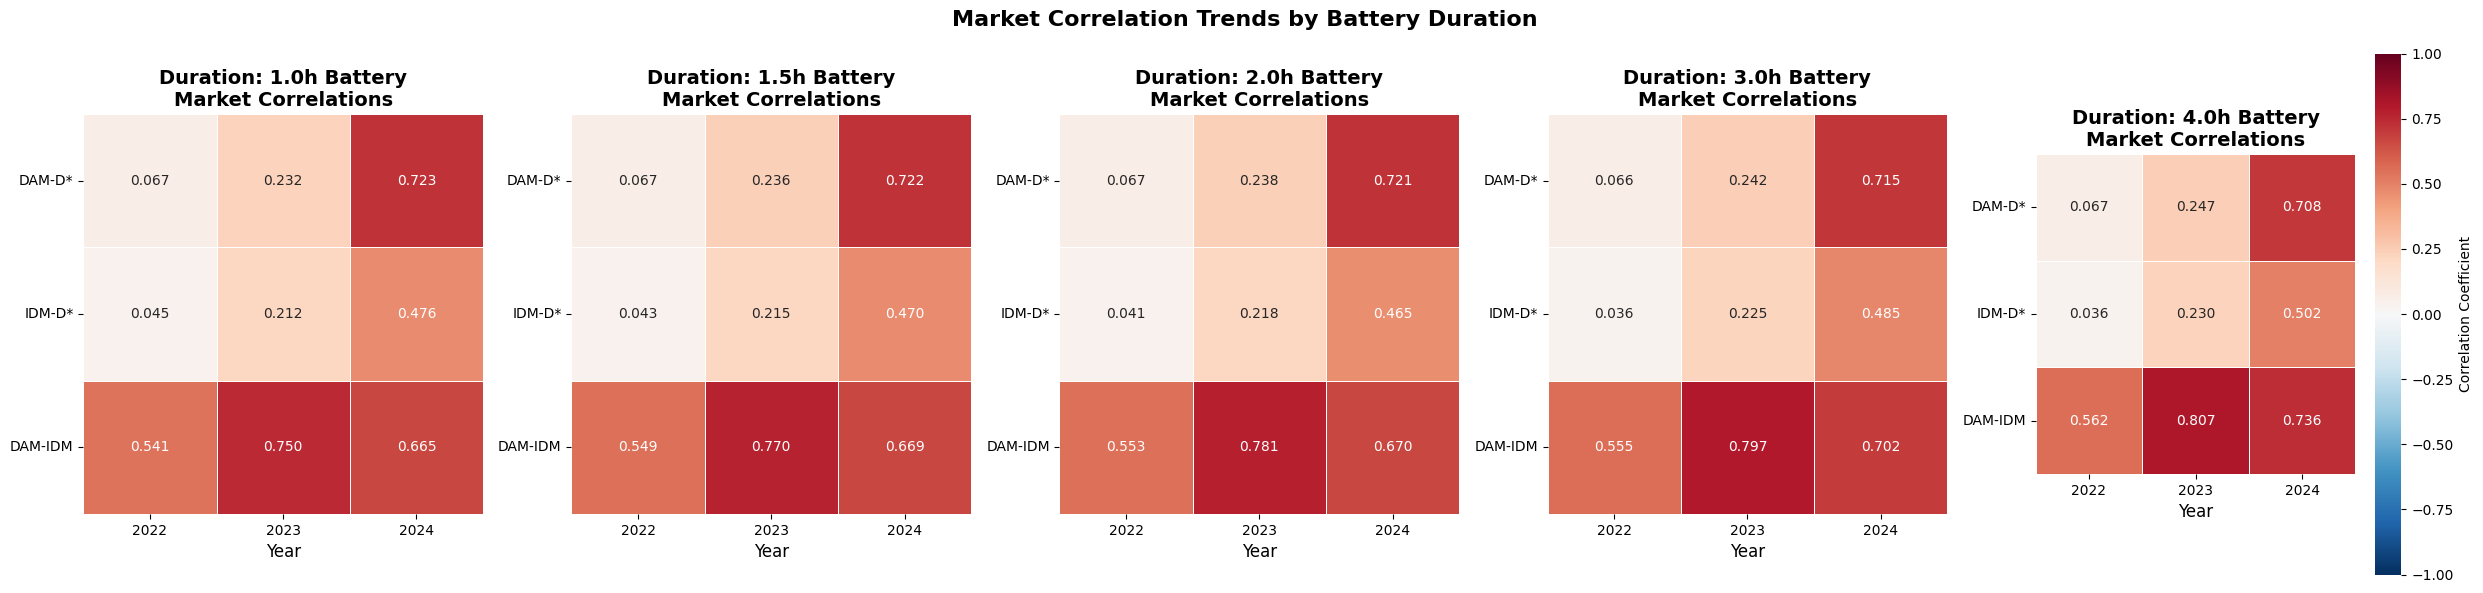

In [17]:
# Create a cleaner correlation heatmap by duration - similar to the green trend chart
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate duration if not already done
if 'duration' not in profits_stats.columns:
    profits_stats['duration'] = profits_stats['energy_mwh'] / profits_stats['power_mw']

print("CREATING CORRELATION HEATMAPS BY DURATION")
print("="*60)

# Get unique durations and years
unique_durations = sorted(profits_stats['duration'].unique())
years = [2022, 2023, 2024]
market_pairs = ['DAM-D*', 'IDM-D*', 'DAM-IDM']

# Create correlation data for each duration
fig, axes = plt.subplots(1, len(unique_durations), figsize=(5*len(unique_durations), 6))

# Handle single duration case
if len(unique_durations) == 1:
    axes = [axes]

for dur_idx, duration in enumerate(unique_durations):
    ax = axes[dur_idx]
    
    # Collect correlation data for this duration across all years
    correlation_data = []
    
    for year in years:
        duration_year_data = profits_stats[(profits_stats['duration'] == duration) & 
                                          (profits_stats['year'] == year)]
        
        if len(duration_year_data) > 0:
            row = [
                duration_year_data['corr_dam_dc'].mean(),   
                duration_year_data['corr_idm_dc'].mean(),   
                duration_year_data['corr_dam_idm'].mean() 
            ]
            correlation_data.append(row)
        else:
            correlation_data.append([0, 0, 0])  # fallback if no data
    
    # Create DataFrame for this duration
    duration_df = pd.DataFrame(correlation_data, 
                              columns=market_pairs,
                              index=years).T
    
    # Create heatmap 
    if dur_idx == len(unique_durations)-1:  # Only show colorbar on last subplot
        sns.heatmap(duration_df, 
                    annot=True, 
                    fmt='.3f', 
                    cmap='RdBu_r',
                    center=0,
                    vmin=-1, vmax=1,
                    ax=ax,
                    cbar_kws={'label': 'Correlation Coefficient'},
                    linewidths=0.5,
                    square=True)
    else:  # No colorbar for other subplots
        sns.heatmap(duration_df, 
                    annot=True, 
                    fmt='.3f', 
                    cmap='RdBu_r',
                    center=0,
                    vmin=-1, vmax=1,
                    ax=ax,
                    cbar=False,  # Use cbar=False, not cbar_kws={'cbar': False}
                    linewidths=0.5,
                    square=True)
    
    ax.set_title(f'Duration: {duration:.1f}h Battery\nMarket Correlations', 
                fontsize=14, fontweight='bold')
    ax.tick_params(axis='y', rotation=0) 
        
    ax.set_xlabel('Year', fontsize=12)
    ax.set_xticklabels(years, rotation=0, fontsize=10)

plt.suptitle('Market Correlation Trends by Battery Duration', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()